In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv


In [18]:
application = pd.read_csv(r'/kaggle/input/credit-card-approval-prediction/application_record.csv')

In [19]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [20]:
credit = pd.read_csv(r'/kaggle/input/credit-card-approval-prediction/credit_record.csv')

In [21]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


# Merge both application_record and credit record on ID


In [22]:
merged_data = application.merge(credit, on=['ID'],how='inner')
merged_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [23]:
merged_data.shape

(777715, 20)

In [24]:
merged_data.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [26]:
merged_data['OCCUPATION_TYPE'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [27]:
# drop null values, axis=0 ( by default )
merged_data.dropna(inplace=True)
merged_data.shape

(537667, 20)

- STATUS: Status of the credit card account.
- 0: 1-29 days past due
- 1: 30-59 days past due
- 2: 60-89 days overdue
- 3: 90-119 days overdue
- 4: 120-149 days overdue
- 5: Overdue or bad debts, write-offs for more than 150 days
- C: paid off that month
- X: No loan for the month
## 1,2,3,4 and 5 are bad clients, X and C are good clients and 0 consider as neutral (not bad and not good) so let's take 0 also as good client.


In [28]:
merged_data['STATUS'].unique()

array(['C', 'X', '0', '1', '5', '4', '3', '2'], dtype=object)

In [29]:
# replacing the status values as good -> 1, bad -> 0

merged_data.STATUS = merged_data.STATUS.map({"X":1,"C":1, "0":1, "1":0, "2":0, "3":0, "4":0, "5":0})
merged_data.sample(5)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
27969,5010460,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0,-18,1
84592,5023865,F,N,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-18179,-2773,1,0,1,0,Sales staff,2.0,-47,1
267277,5053197,F,N,Y,0,315000.0,Working,Higher education,Married,House / apartment,-15527,-3792,1,1,1,0,Accountants,2.0,-6,1
122845,5028831,M,N,Y,0,171000.0,Working,Secondary / secondary special,Married,House / apartment,-19338,-1695,1,0,0,0,Drivers,2.0,-46,1
328053,5062215,F,N,Y,2,153000.0,Commercial associate,Higher education,Married,House / apartment,-13283,-1324,1,0,0,0,Accountants,4.0,-28,1


In [30]:
merged_data.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
merged_data['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [33]:
# replace M & F as 0 & 1 
merged_data['CODE_GENDER'].replace('M',0,inplace=True) #male -> 0
merged_data['CODE_GENDER'].replace('F',1,inplace=True)#female -> 1
merged_data['FLAG_OWN_CAR'].replace('M',0,inplace=True) 
merged_data['FLAG_OWN_CAR'].replace('F',1,inplace=True)
merged_data['FLAG_OWN_REALTY'].replace('M',0,inplace=True)
merged_data['FLAG_OWN_REALTY'].replace('F',1,inplace=True)
merged_data.head(4)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,0,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
32,5008806,0,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1,1
33,5008806,0,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,1
34,5008806,0,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3,1


In [34]:
merged_data['CODE_GENDER'].unique()

array([0, 1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='STATUS', ylabel='AMT_INCOME_TOTAL'>

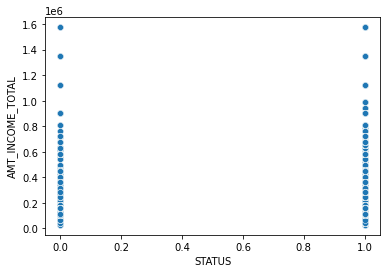

In [35]:
sns.scatterplot( merged_data.STATUS , merged_data.AMT_INCOME_TOTAL)


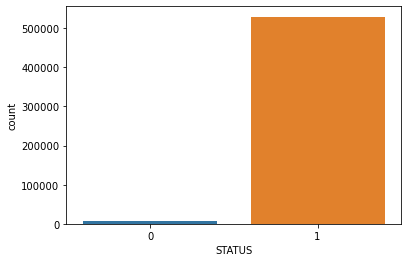

In [36]:
sns.countplot( x = 'STATUS' , data = merged_data )
plt.show()

# Observation : Unbalanced Data

In [37]:
merged_data['NAME_INCOME_TYPE'].value_counts()

Working                 332868
Commercial associate    151412
State servant            52733
Pensioner                  332
Student                    322
Name: NAME_INCOME_TYPE, dtype: int64

<AxesSubplot:>

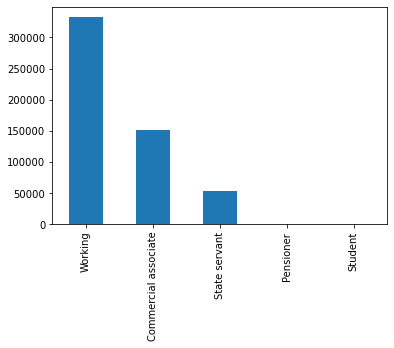

In [38]:
merged_data.NAME_INCOME_TYPE.value_counts().plot(kind='bar')

In [39]:
def income_tans(df,col):
    result_col = []
    for i in df[col]:
        if i == 'Working':
            result_col.append('Working')
        elif i == 'Commercial associate':
            result_col.append('Commercial associate')
        elif i == 'State servant':
            result_col.append('State servant')
        else:
            result_col.append('Others')
    df[col] = result_col
    return df


income_tans(merged_data,'NAME_INCOME_TYPE')
merged_data.NAME_INCOME_TYPE.value_counts()

Working                 332868
Commercial associate    151412
State servant            52733
Others                     654
Name: NAME_INCOME_TYPE, dtype: int64

In [40]:
merged_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,0,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
32,5008806,0,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1,1
33,5008806,0,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,1
34,5008806,0,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3,1
35,5008806,0,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4,1


In [41]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537667 entries, 31 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  int64  
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  int64  
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_INCOME_TYPE     537667 non-null  object 
 7   NAME_EDUCATION_TYPE  537667 non-null  object 
 8   NAME_FAMILY_STATUS   537667 non-null  object 
 9   NAME_HOUSING_TYPE    537667 non-null  object 
 10  DAYS_BIRTH           537667 non-null  int64  
 11  DAYS_EMPLOYED        537667 non-null  int64  
 12  FLAG_MOBIL           537667 non-null  int64  
 13  FLAG_WORK_PHONE      537667 non-null  int64  
 14  FLAG_PHONE           537667 non-null  int64  
 15  FLAG_EMAIL      

In [42]:
merged_data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    358317
Higher education                 153770
Incomplete higher                 20590
Lower secondary                    4556
Academic degree                     434
Name: NAME_EDUCATION_TYPE, dtype: int64

In [43]:
merged_data.NAME_EDUCATION_TYPE = merged_data.NAME_EDUCATION_TYPE.str.split('/').str[0]
merged_data.NAME_EDUCATION_TYPE.value_counts()

Secondary            358317
Higher education     153770
Incomplete higher     20590
Lower secondary        4556
Academic degree         434
Name: NAME_EDUCATION_TYPE, dtype: int64

In [44]:
merged_data.NAME_FAMILY_STATUS.value_counts()


Married                 384003
Single / not married     65944
Civil marriage           44083
Separated                31394
Widow                    12243
Name: NAME_FAMILY_STATUS, dtype: int64

In [45]:
merged_data.NAME_FAMILY_STATUS = merged_data.NAME_FAMILY_STATUS.str.split('/').str[0]
merged_data.NAME_FAMILY_STATUS.value_counts()

Married           384003
Single             65944
Civil marriage     44083
Separated          31394
Widow              12243
Name: NAME_FAMILY_STATUS, dtype: int64

In [46]:
merged_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,0,Y,Y,0,112500.0,Working,Secondary,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
32,5008806,0,Y,Y,0,112500.0,Working,Secondary,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1,1
33,5008806,0,Y,Y,0,112500.0,Working,Secondary,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,1
34,5008806,0,Y,Y,0,112500.0,Working,Secondary,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3,1
35,5008806,0,Y,Y,0,112500.0,Working,Secondary,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4,1


In [47]:
merged_data.NAME_HOUSING_TYPE.value_counts()


House / apartment      474177
With parents            29351
Municipal apartment     18023
Rented apartment         8561
Office apartment         4159
Co-op apartment          3396
Name: NAME_HOUSING_TYPE, dtype: int64

In [48]:
merged_data.NAME_HOUSING_TYPE = merged_data.NAME_HOUSING_TYPE.str.split('/').str[0]
merged_data.NAME_HOUSING_TYPE.value_counts()

House                  474177
With parents            29351
Municipal apartment     18023
Rented apartment         8561
Office apartment         4159
Co-op apartment          3396
Name: NAME_HOUSING_TYPE, dtype: int64

In [49]:
merged_data.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,0,Y,Y,0,112500.0,Working,Secondary,Married,House,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
32,5008806,0,Y,Y,0,112500.0,Working,Secondary,Married,House,-21474,-1134,1,0,0,0,Security staff,2.0,-1,1


In [50]:
merged_data['DAYS_BIRTH'].min()

-24611

- DAYS_BIRTH : Birthday --> Count backwards from current day (0), -1 means yesterday
- DAYS_EMPLOYED : Start date of employment --> Count backwards from current day(0). If positive, it means the person currently unemployed.

In [51]:
merged_data['Age']=-(merged_data['DAYS_BIRTH'])//365

merged_data['employee_from_years']=-(merged_data['DAYS_EMPLOYED'])//365

merged_data.drop(columns=('DAYS_BIRTH'), inplace=True)

merged_data.drop(columns=('DAYS_EMPLOYED'), inplace=True)
merged_data.head(4)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Age,employee_from_years
31,5008806,0,Y,Y,0,112500.0,Working,Secondary,Married,House,1,0,0,0,Security staff,2.0,0,1,58,3
32,5008806,0,Y,Y,0,112500.0,Working,Secondary,Married,House,1,0,0,0,Security staff,2.0,-1,1,58,3
33,5008806,0,Y,Y,0,112500.0,Working,Secondary,Married,House,1,0,0,0,Security staff,2.0,-2,1,58,3
34,5008806,0,Y,Y,0,112500.0,Working,Secondary,Married,House,1,0,0,0,Security staff,2.0,-3,1,58,3


In [52]:
merged_data['Age'].min()

20

In [53]:
merged_data.drop(columns=['ID','CNT_CHILDREN','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_EMAIL'], inplace=True)
merged_data.sample(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Age,employee_from_years
761706,1,N,Y,103500.0,Commercial associate,Higher education,Married,House,0,Cleaning staff,2.0,-16,1,51,2
64488,0,Y,Y,157500.0,Commercial associate,Secondary,Single,Municipal apartment,0,Laborers,1.0,-8,1,27,5
49824,1,N,Y,225000.0,Commercial associate,Secondary,Married,House,0,Core staff,2.0,-7,1,33,0
409656,0,Y,Y,135000.0,Working,Incomplete higher,Married,House,1,Laborers,3.0,-40,1,31,13
393742,1,N,N,135000.0,Commercial associate,Higher education,Married,With parents,0,Core staff,2.0,-2,1,42,1
202005,0,Y,N,180000.0,Working,Secondary,Married,House,1,Drivers,2.0,-39,1,28,0
656440,1,N,N,135000.0,Working,Secondary,Widow,House,1,Laborers,1.0,-3,1,43,1
280179,1,N,N,270000.0,State servant,Higher education,Married,House,1,Core staff,2.0,-23,1,36,6
102988,1,N,Y,225000.0,Commercial associate,Secondary,Civil marriage,Municipal apartment,0,Accountants,3.0,-5,1,38,9
473200,1,N,N,112500.0,Commercial associate,Higher education,Married,With parents,0,Accountants,2.0,-15,1,54,4


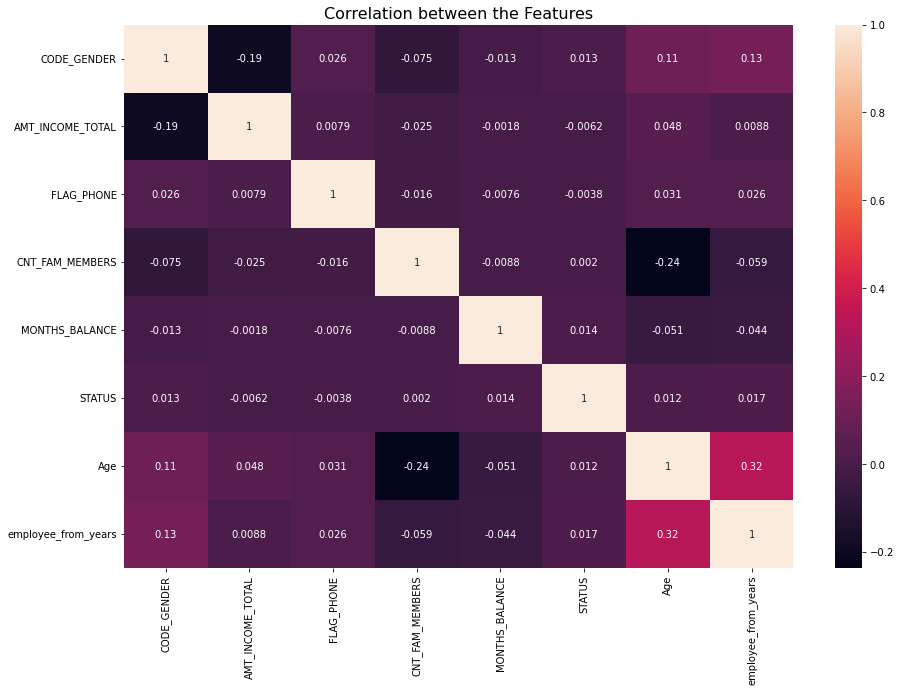

In [54]:
plt.figure(figsize = (15,10))
sns.heatmap(merged_data.corr(), annot = True )
plt.title('Correlation between the Features', size = 16)
plt.show()


In [55]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537667 entries, 31 to 777714
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          537667 non-null  int64  
 1   FLAG_OWN_CAR         537667 non-null  object 
 2   FLAG_OWN_REALTY      537667 non-null  object 
 3   AMT_INCOME_TOTAL     537667 non-null  float64
 4   NAME_INCOME_TYPE     537667 non-null  object 
 5   NAME_EDUCATION_TYPE  537667 non-null  object 
 6   NAME_FAMILY_STATUS   537667 non-null  object 
 7   NAME_HOUSING_TYPE    537667 non-null  object 
 8   FLAG_PHONE           537667 non-null  int64  
 9   OCCUPATION_TYPE      537667 non-null  object 
 10  CNT_FAM_MEMBERS      537667 non-null  float64
 11  MONTHS_BALANCE       537667 non-null  int64  
 12  STATUS               537667 non-null  int64  
 13  Age                  537667 non-null  int64  
 14  employee_from_years  537667 non-null  int64  
dtypes: float64(2), i

# Label Encoder

In [56]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# list of column names to be encoded
columns_to_be_encoded = [ 'FLAG_OWN_CAR' , 'FLAG_OWN_REALTY' , 'NAME_INCOME_TYPE' , 'NAME_EDUCATION_TYPE' , 'NAME_FAMILY_STATUS' , 'NAME_HOUSING_TYPE' , 'OCCUPATION_TYPE']  

# Instantiate the encoders
encoders = { column : LabelEncoder() for column in columns_to_be_encoded}

for column in columns_to_be_encoded:
    merged_data[column] = encoders[column].fit_transform(merged_data[column])

In [57]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537667 entries, 31 to 777714
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          537667 non-null  int64  
 1   FLAG_OWN_CAR         537667 non-null  int64  
 2   FLAG_OWN_REALTY      537667 non-null  int64  
 3   AMT_INCOME_TOTAL     537667 non-null  float64
 4   NAME_INCOME_TYPE     537667 non-null  int64  
 5   NAME_EDUCATION_TYPE  537667 non-null  int64  
 6   NAME_FAMILY_STATUS   537667 non-null  int64  
 7   NAME_HOUSING_TYPE    537667 non-null  int64  
 8   FLAG_PHONE           537667 non-null  int64  
 9   OCCUPATION_TYPE      537667 non-null  int64  
 10  CNT_FAM_MEMBERS      537667 non-null  float64
 11  MONTHS_BALANCE       537667 non-null  int64  
 12  STATUS               537667 non-null  int64  
 13  Age                  537667 non-null  int64  
 14  employee_from_years  537667 non-null  int64  
dtypes: float64(2), i

# Split Data

In [58]:
merged_data.head(2)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Age,employee_from_years
31,0,1,1,112500.0,3,4,1,1,0,16,2.0,0,1,58,3
32,0,1,1,112500.0,3,4,1,1,0,16,2.0,-1,1,58,3


In [59]:
merged_data.shape

(537667, 15)

In [60]:
X = merged_data.drop(columns=('STATUS'),axis=1)
y = merged_data.STATUS

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
print('Accuracy is : ',accuracy_score(y_test, y_pred))

Accuracy is :  0.9842096453214797


In [65]:
from sklearn.metrics import recall_score , precision_score , accuracy_score , f1_score
print("Accuracy : " , accuracy_score ( y_test , y_pred ) )
print("Recall : " , recall_score ( y_test , y_pred ) )
print("Precision : " , precision_score ( y_test , y_pred ) )
print("F1 Score : " , f1_score ( y_test , y_pred ) )

Accuracy :  0.9842096453214797
Recall :  1.0
Precision :  0.9842096453214797
F1 Score :  0.9920419927824905


In [70]:
y_pred2= log_model.predict(X_train)
print("Accuracy : " , accuracy_score ( y_train , y_pred2 ) )
print("Recall : " , recall_score ( y_train , y_pred2 ) )
print("Precision : " , precision_score ( y_train , y_pred2 ) )
print("F1 Score : " , f1_score ( y_train , y_pred2 ) )

Accuracy :  0.9844536457328315
Recall :  1.0
Precision :  0.9844536457328315
F1 Score :  0.9921659272311057


In [74]:
from sklearn.metrics import confusion_matrix 
confusion_mat = confusion_matrix(y_test,y_pred)

In [75]:
specificity_test = confusion_mat[0,0] / (confusion_mat[0,0] + confusion_mat[0,1])
specificity_test

0.0

In [76]:
from sklearn.metrics import confusion_matrix 
confusion_mat2 = confusion_matrix(y_train,y_pred2)

In [77]:
specificity_test2 = confusion_mat2[0,0] / (confusion_mat2[0,0] + confusion_mat2[0,1])
specificity_test2

0.0